# Prerequisites

In [1]:
# connect to drive to retrieve dataset
from google.colab import drive
drive.mount('/content/gdrive') 
# don't forget to make a connection between the documents in the shared drive 
# and your own before uploading the documents to colab

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# necessary because upgraded version does not contain package for the model anymore
!pip install --upgrade gensim==3.8

# upgrade pandas for gensimvis
!pip install pandas==1.3.1

# install pyLDAvis 
# DON'T DO THIS BEFORE LOADING THE DATA
#!pip install pyLDAvis

     |████████████████████████████████| 24.2 MB 60.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 11.5 MB 4.5 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.


In [4]:
# loading Mallet to Colab
# https://medium.com/analytics-vidhya/mallet-machine-learning-for-language-toolkit-installation-on-google-colaboratory-80b75fe486cb

# only need to run this once!!

import os #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.13" 2021-10-19
OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [5]:
# check your documents before doing this multiple times
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2022-01-23 15:00:44--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2022-01-23 15:00:44--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  10.2MB/s    in 1.5s    

2022-01-23 15:00:46 (10.2 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.

In [ ]:
# not sure whether this was necessary
#import zipfile
#from google.colab import files

#uploaded = files.upload()

In [6]:
# define path to mallet
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 
corpus_path = 'transcripts' # you need to change this path to the directory containing your corpus of .txt files

# Topic Modelling
<hr>

In [2]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/cleaned_songs.csv')
df.head()

,Unnamed: 0,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce,Pop,Oh baby how you doing You know I'm gonna cut r...
1,5,all-i-could-do-was-cry,2008,beyonce,Pop,I heard Church bells ringing I heard A choir s...
2,6,once-in-a-lifetime,2008,beyonce,Pop,This is just another day that I would spend Wa...
3,9,why-don-t-you-love-me,2009,beyonce,Pop,N n now honey You better sit down and look aro...
4,16,poison,2009,beyonce,Pop,You're bad for me I clearly get it I don't see...


## Tokenization
<hr>

### NLTK

In [3]:
# NLTK/Pure Python
def tokenize(text):
    punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    for punctuation in punctuations:
        text = text.replace(punctuation, '')
    text = text.lower() 
    text = text.split()
    return text

nltk_tokenized_texts = [tokenize(lyrics) for lyrics in df.lyrics]
print(nltk_tokenized_texts)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Spacy

In [ ]:
# Spacy
import spacy

nlp = spacy.load("en_core_web_sm")
processed_texts = [lyrics for lyrics in nlp.pipe(df.lyrics, 
                                              disable=["ner",
                                                       "parser"])]

# this part also removes stop words (I guess that may be undesired)
spacy_tokenized_texts_sw = [[word.text.lower() for word in processed_text if not word.is_stop] 
                      for processed_text in processed_texts]
print(spacy_tokenized_texts_sw)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: Deprecat

## Vectorization
<hr>

#### Imports

In [ ]:
from gensim.corpora import Dictionary

#### Specifications

In [ ]:
MIN_DF = 1 # minium document frequency
MAX_DF = 0.8 # maximum document frequency

### NLTK

In [ ]:
# nltk
nltk_dictionary = Dictionary(nltk_tokenized_texts) # get the vocabulary
nltk_dictionary.filter_extremes(no_below=MIN_DF, 
                           no_above=MAX_DF)
nltk_corpus = [nltk_dictionary.doc2bow(text) for text in nltk_tokenized_texts]

### Spacy

In [ ]:
# spacy
spacy_dictionary = Dictionary(spacy_tokenized_texts_sw) # get the vocabulary
spacy_dictionary.filter_extremes(no_below=MIN_DF, 
                           no_above=MAX_DF)
spacy_corpus = [spacy_dictionary.doc2bow(text) for text in spacy_tokenized_texts_sw]

## Train the Model
<hr>

#### Imports

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
from gensim import similarities

import os.path
import re
import glob

import nltk
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Specifications

In [ ]:
N_TOPICS = 50 # k
N_ITERATIONS = 1000 # usually 1000 will do

### NLTK

In [ ]:
nltk_lda = LdaMallet(mallet_path,
                corpus=nltk_corpus,
                id2word=nltk_dictionary,
                num_topics=N_TOPICS,
                optimize_interval=10,
                iterations=N_ITERATIONS)

### Spacy

In [ ]:
spacy_lda = LdaMallet(mallet_path,
                corpus=spacy_corpus,
                id2word=spacy_dictionary,
                num_topics=N_TOPICS,
                optimize_interval=10,
                iterations=N_ITERATIONS)

## Word Topic Distribution
<hr>

#### Imports & Functions

In [ ]:
# WordClouds:
import requests
import numpy as np
import matplotlib.pyplot as plt

from io import BytesIO
from PIL import Image
from wordcloud import WordCloud

In [ ]:
def black_circle():
    response = requests.get('https://i.ibb.co/kHNWRYD/black-circle-better.png')
    circle_mask = np.array(Image.open(BytesIO(response.content)))
    return circle_mask 

#### Specifications

In [ ]:
TOPIC = 0
MAX_WORDS = 10

# WordToCloud:
TOPIC2PLOT = 1
MAX_WORDS = 80

### NLTK

In [ ]:
# words for the first topic:
nltk_words = nltk_lda.show_topic(TOPIC, topn=MAX_WORDS) 
print(nltk_words)

[('ive', 0.15786970993818356), ('low', 0.06609605325725154), ('summer', 0.021398002853067047), ('loved', 0.019971469329529243), ('place', 0.018544935805991442), ('water', 0.018544935805991442), ('cold', 0.01806942463147884), ('sand', 0.01759391345696624), ('remember', 0.017118402282453638), ('long', 0.016642891107941038), ('promise', 0.014740846409890632), ('mine', 0.014265335235378032), ('chorus', 0.012363290537327628), ('open', 0.011887779362815026), ('truth', 0.011887779362815026), ('stone', 0.011887779362815026), ('die', 0.009985734664764621), ('dry', 0.009985734664764621), ('broken', 0.00903471231573942), ('fire', 0.008559201141226819), ('high', 0.008083689966714217), ('dream', 0.008083689966714217), ('free', 0.008083689966714217), ('ocean', 0.008083689966714217), ('wasted', 0.007608178792201617), ('hanging', 0.007608178792201617), ('cassy', 0.007132667617689016), ('lighten', 0.006657156443176415), ('walked', 0.006181645268663814), ('day', 0.005706134094151213), ('hell', 0.0057061

In [ ]:
# word topic distribution in table
nltk_words = nltk_lda.show_topic(TOPIC, topn=len(spacy_dictionary)) # get all the words
nltk_topic_distr_df = pd.DataFrame(nltk_words, columns=['word', 'prop']) 
nltk_topic_distr_df.sort_values('prop', ascending=False).head()

,word,prop
0,ive,0.157870
1,low,0.066096
2,summer,0.021398
3,loved,0.019971
4,place,0.018545


In [ ]:
# loop through the number of topics
for topic in range(N_TOPICS):
    nltk_words = nltk_lda.show_topic(topic, 10)
    nltk_topic_n_words = ' '.join([word[0] for word in nltk_words])
    print('Topic {}: {}'.format(str(topic), nltk_topic_n_words))

Topic 0: ive low summer loved water place cold sand remember long
Topic 1: run whoa hand slip follow scream place faster inside lead
Topic 2: nah ma hop hip ya believing dis train song turn
Topic 3: live city people york faces romance life dead prerogative hard
Topic 4: life waiting saving left time youre save youve show good
Topic 5: la na runaway kiss girl ahhh fritz hurts party slumber
Topic 6: white ghetto heaven ride america stay hood streets made gave
Topic 7: yall yo annie roll ay hit rock spit niggaz block
Topic 8: love girl baby dont heart time give feel leave didnt
Topic 9: tonight ah feel free everybodys freedom body spark worship call
Topic 10: mind hear play time wave im lucky babe blind aint
Topic 11: time im head forever good leave place end set makes
Topic 12: real boom alright gotta lets cracks beat im bit rock
Topic 13: day stay back stand living forget weve cold strong super
Topic 14: woah gyal panda wine party ow metal x6 animal cars
Topic 15: high fly radar gimme j

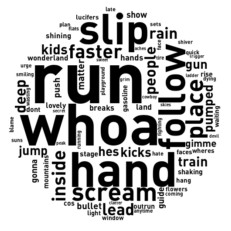

In [ ]:
circle_mask = black_circle()
wordcloud = WordCloud(background_color='#fff',
                      font_path='/content/gdrive/MyDrive/DIN Alternate Bold.otf',
                      color_func=lambda *args, **kwargs: (0,0,0),
                      mask=circle_mask)
wordcloud.generate_from_frequencies(frequencies=dict(nltk_lda.show_topic(TOPIC2PLOT, MAX_WORDS)))

plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

### Spacy

In [ ]:
# words for the first topic:
spacy_words = spacy_lda.show_topic(TOPIC, topn=MAX_WORDS) 
print(spacy_words)

[('baby', 0.25547785547785545), ('blow', 0.031701631701631705), ('uh', 0.024242424242424242), ('yeah', 0.022843822843822845), ('wit', 0.022377622377622378), ('man', 0.018648018648018648), ('millionaire', 0.017715617715617717), ('time', 0.016783216783216783), ('bomb', 0.014918414918414918), ('thing', 0.013986013986013986), ("i'mma", 0.011655011655011656), ('ready', 0.011655011655011656), ('touch', 0.010256410256410256), ('meet', 0.010256410256410256), ('bombs', 0.009790209790209791), ('rockstar', 0.009324009324009324), ('ya', 0.008857808857808859), ('bed', 0.008857808857808859), ('reason', 0.008857808857808859), ('play', 0.008391608391608392), ('till', 0.007925407925407926), ('fred', 0.007459207459207459), ('care', 0.007459207459207459), ('yo', 0.007459207459207459), ('doo', 0.006526806526806527), ('rhythm', 0.006526806526806527), ('choice', 0.006060606060606061), ('voice', 0.005594405594405594), ('weapon', 0.005594405594405594), ('night', 0.005594405594405594), ('ride', 0.0055944055944

In [ ]:
# word topic distribution in table
spacy_words = spacy_lda.show_topic(TOPIC, topn=len(spacy_dictionary)) # get all the words
spacy_topic_distr_df = pd.DataFrame(spacy_words, columns=['word', 'prop']) 
spacy_topic_distr_df.sort_values('prop', ascending=False).head()

,word,prop
0,baby,0.255478
1,blow,0.031702
2,uh,0.024242
3,yeah,0.022844
4,wit,0.022378


In [ ]:
# loop through the number of topics
for topic in range(N_TOPICS):
    spacy_words = spacy_lda.show_topic(topic, 10)
    spacy_topic_n_words = ' '.join([word[0] for word in spacy_words])
    print('Topic {}: {}'.format(str(topic), spacy_topic_n_words))

Topic 0: baby blow uh yeah wit man millionaire time bomb thing
Topic 1: rock thing morning luv robot body god early girls roll
Topic 2: waiting goodbye living leggy ready blondie country bring london addiction
Topic 3: love feel lover heart 'cause true feeling leave surrender girl
Topic 4: leaving step promise flow escape arrows lost place green final
Topic 5: alive gyal fold wine party coming miracle build animal noise
Topic 6: boom metal beat jump prerogative vilify knock rock fluffle motherfuckers
Topic 7: whoa slip free hear dem freedom control sound mm hole
Topic 8: work hard play board ai tryin lot uh till night
Topic 9: good time wanna true dat grow friends dust fun romance
Topic 10: pop lies cherry america cracks black che white devil lie
Topic 11: hey ey ya lie watch wo world die james god
Topic 12: care riding round gettin spend hop hip running annie hurts
Topic 13: uh eh higher dirty told hot gun bass lot favorite
Topic 14: na gon tonight good bring stop wo working pyramid b

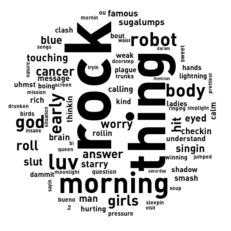

In [ ]:
circle_mask = black_circle()
wordcloud = WordCloud(background_color='#fff',
                      font_path='/content/gdrive/MyDrive/DIN Alternate Bold.otf',
                      color_func=lambda *args, **kwargs: (0,0,0),
                      mask=circle_mask)
wordcloud.generate_from_frequencies(frequencies=dict(spacy_lda.show_topic(TOPIC2PLOT, MAX_WORDS)))

plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

## Document topic distributions

### NLTK

In [ ]:
# get the topic distributions of each document
nltk_transformed_docs = nltk_lda.load_document_topics()

In [ ]:
#  loop over this iterator, we get the topic distributions for each document
nltk_transformed_docs = nltk_lda.load_document_topics()
nltk_topic_distributions = pd.DataFrame([[x[1] for x in doc] for doc in nltk_transformed_docs], 
             columns=['topic_{}'.format(i) for i in range(N_TOPICS)])
nltk_topic_distributions.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49
0,0.007524,0.000326,0.000093,0.000290,0.014904,0.000082,0.000178,0.000189,0.001176,0.000293,0.000798,0.008138,0.000168,0.000938,0.000055,0.119554,0.372678,0.000363,0.028546,0.000207,0.000746,0.000318,0.000143,0.000276,0.000221,0.128332,0.000115,0.014191,0.000114,0.000296,0.000746,0.085638,0.000327,0.000116,0.000186,0.000220,0.001450,0.000492,0.000580,0.000237,0.000189,0.000548,0.001240,0.000357,0.000347,0.204688,0.000561,0.000227,0.000219,0.000380
1,0.000815,0.000532,0.000151,0.000473,0.024286,0.000134,0.000290,0.000308,0.001917,0.000477,0.035637,0.013261,0.000273,0.001528,0.000090,0.000237,0.000662,0.000591,0.092299,0.000337,0.001216,0.000518,0.000233,0.000450,0.046143,0.003096,0.000188,0.000234,0.000186,0.011928,0.001216,0.128102,0.011979,0.000190,0.000304,0.023250,0.036701,0.504412,0.000945,0.000386,0.000308,0.000894,0.036357,0.000582,0.000565,0.001616,0.012361,0.000370,0.000357,0.000619
2,0.000854,0.000557,0.000158,0.000495,0.001461,0.000140,0.000304,0.000322,0.145947,0.000500,0.001363,0.241800,0.000287,0.013597,0.000094,0.000249,0.000694,0.000619,0.000769,0.012348,0.013269,0.000542,0.072214,0.156405,0.000377,0.039229,0.000197,0.000245,0.000195,0.036490,0.109228,0.002305,0.000559,0.000199,0.000318,0.000376,0.014472,0.000840,0.000990,0.000405,0.000323,0.000936,0.014112,0.000610,0.000592,0.109647,0.000959,0.000387,0.000374,0.000649
3,0.560890,0.000286,0.000081,0.000254,0.000750,0.000072,0.018633,0.000166,0.001031,0.000257,0.043811,0.000977,0.030941,0.000822,0.000048,0.000128,0.000356,0.018794,0.000395,0.000181,0.000654,0.000279,0.000125,0.000242,0.006353,0.198748,0.000101,0.037079,0.000100,0.000259,0.000654,0.001183,0.000287,0.000102,0.000164,0.000193,0.001272,0.000431,0.062096,0.000208,0.000166,0.000481,0.007246,0.000313,0.000304,0.000869,0.000492,0.000199,0.000192,0.000333
4,0.023438,0.000526,0.034098,0.079681,0.001379,0.000132,0.000287,0.000304,0.001895,0.000472,0.001286,0.081008,0.000270,0.001511,0.000089,0.000235,0.000655,0.000584,0.000725,0.000333,0.001202,0.000512,0.000231,0.000445,0.000356,0.116222,0.000185,0.079444,0.000184,0.136271,0.136996,0.002174,0.000527,0.000188,0.000300,0.000355,0.047601,0.000792,0.102780,0.000382,0.000305,0.000883,0.024630,0.000576,0.102404,0.001598,0.000905,0.000365,0.000353,0.011928


In [ ]:
# If we want to get the most prominent topics (i.e. the topics with the highest 
# average proportion) we can just use mean(), and then sort the values:
nltk_topic_distributions.mean().sort_values(ascending=False)

topic_25    0.074352
topic_36    0.051026
topic_42    0.047722
topic_8     0.044655
topic_30    0.043202
topic_31    0.041682
topic_11    0.039484
topic_13    0.037741
topic_45    0.035190
topic_4     0.033853
topic_10    0.029743
topic_20    0.025538
topic_0     0.022169
topic_41    0.021976
topic_46    0.021270
topic_37    0.021216
topic_16    0.020203
topic_38    0.019643
topic_44    0.018382
topic_32    0.017955
topic_18    0.016496
topic_43    0.016314
topic_49    0.016263
topic_29    0.014817
topic_17    0.014784
topic_21    0.014281
topic_23    0.013820
topic_9     0.013463
topic_3     0.013061
topic_1     0.012332
topic_39    0.012133
topic_48    0.011236
topic_47    0.011211
topic_35    0.011136
topic_19    0.011052
topic_27    0.010887
topic_40    0.010763
topic_34    0.010570
topic_24    0.010290
topic_12    0.009912
topic_6     0.009316
topic_5     0.009270
topic_7     0.008978
topic_15    0.008838
topic_22    0.008217
topic_26    0.007971
topic_28    0.007663
topic_33    0

### Spacy

In [ ]:
# get the topic distributions of each document
spacy_transformed_docs = spacy_lda.load_document_topics()

In [ ]:
#  loop over this iterator, we get the topic distributions for each document
spacy_transformed_docs = spacy_lda.load_document_topics()
spacy_topic_distributions = pd.DataFrame([[x[1] for x in doc] for doc in spacy_transformed_docs], 
             columns=['topic_{}'.format(i) for i in range(N_TOPICS)])
spacy_topic_distributions.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49
0,0.000527,0.000275,0.000249,0.001201,0.017892,0.000201,0.000163,0.000203,0.000404,0.000508,0.000145,0.009067,0.000217,0.000291,0.000779,0.001128,0.009642,0.151247,0.000158,0.000442,0.001475,0.000103,0.000174,0.000508,0.000659,0.088328,0.000089,0.000664,0.000107,0.000811,0.000343,0.098806,0.000815,0.000170,0.000348,0.009463,0.000865,0.017694,0.000273,0.000140,0.000661,0.044518,0.518115,0.000214,0.000212,0.018378,0.000510,0.000412,0.000217,0.000188
1,0.000707,0.000369,0.000334,0.001610,0.000467,0.000270,0.000219,0.000272,0.000542,0.000681,0.000194,0.000396,0.000291,0.000390,0.001045,0.236792,0.095279,0.002858,0.000212,0.000593,0.001978,0.000138,0.000234,0.000681,0.000884,0.000822,0.000120,0.000890,0.000144,0.001088,0.000460,0.014875,0.001093,0.000228,0.000467,0.000927,0.295259,0.000203,0.000366,0.000188,0.000887,0.000886,0.000800,0.000287,0.000285,0.024647,0.294783,0.012316,0.000291,0.000252
2,0.041350,0.000424,0.135508,0.001850,0.000537,0.000310,0.000251,0.000312,0.000623,0.081857,0.000223,0.013967,0.000334,0.000448,0.001200,0.001738,0.068904,0.003283,0.000244,0.000681,0.002272,0.000159,0.000269,0.000782,0.014528,0.000944,0.000138,0.001023,0.000165,0.014762,0.000529,0.111673,0.257993,0.000262,0.000537,0.190240,0.001333,0.000233,0.000421,0.000215,0.001019,0.028043,0.000918,0.000329,0.013840,0.001286,0.000785,0.000635,0.000334,0.000290
3,0.000371,0.000194,0.000175,0.000845,0.000245,0.000141,0.000115,0.000143,0.000285,0.000357,0.000102,0.000208,0.000153,0.006377,0.000548,0.000794,0.000613,0.001500,0.000111,0.006484,0.099800,0.000073,0.000123,0.000357,0.000464,0.000431,0.000063,0.000467,0.000075,0.000571,0.000242,0.001632,0.043782,0.000120,0.000245,0.000486,0.000609,0.000106,0.000192,0.000098,0.000465,0.000465,0.012765,0.006323,0.000149,0.809202,0.000359,0.000290,0.000153,0.000132
4,0.000752,0.000392,0.000354,0.001711,0.000497,0.000287,0.000232,0.000289,0.000576,0.000723,0.000207,0.000421,0.000309,0.137905,0.001110,0.001607,0.001241,0.128028,0.000225,0.250613,0.039599,0.000147,0.000249,0.000723,0.013438,0.000873,0.000127,0.000946,0.025151,0.001156,0.000489,0.165794,0.063657,0.000243,0.000496,0.000985,0.001233,0.000216,0.000389,0.000199,0.000942,0.000942,0.088344,0.000305,0.037800,0.026188,0.000726,0.000587,0.000309,0.000268


In [ ]:
# If we want to get the most prominent topics (i.e. the topics with the highest 
# average proportion) we can just use mean(), and then sort the values:
spacy_topic_distributions.mean().sort_values(ascending=False)

topic_17    0.076994
topic_31    0.072720
topic_20    0.048938
topic_3     0.041444
topic_15    0.034971
topic_24    0.032486
topic_36    0.030921
topic_45    0.030614
topic_32    0.029938
topic_29    0.028559
topic_16    0.027540
topic_14    0.027501
topic_41    0.025042
topic_40    0.024900
topic_27    0.023736
topic_35    0.022741
topic_25    0.022627
topic_19    0.019603
topic_9     0.018364
topic_42    0.017996
topic_0     0.017934
topic_46    0.017874
topic_23    0.017569
topic_47    0.016732
topic_4     0.016128
topic_8     0.014782
topic_34    0.014765
topic_2     0.014678
topic_13    0.013490
topic_30    0.012943
topic_48    0.012644
topic_1     0.011765
topic_11    0.011536
topic_38    0.011298
topic_7     0.010214
topic_43    0.010084
topic_12    0.009668
topic_21    0.009591
topic_44    0.009244
topic_18    0.009132
topic_6     0.009119
topic_22    0.008972
topic_5     0.008861
topic_39    0.008611
topic_49    0.008232
topic_33    0.008097
topic_10    0.007905
topic_28    0

## Explore Using pyLDAvis

#### Imports

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

### NLTK

In [ ]:
pyLDAvis.enable_notebook()

nltk_lda_conv = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(nltk_lda)

gensimvis.prepare(nltk_lda_conv, nltk_corpus, nltk_dictionary)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
30    -0.010143 -0.130229       1        1  6.808412
25    -0.089333  0.132595       2        1  6.101606
36    -0.225239 -0.012882       3        1  4.883432
31    -0.147079 -0.062317       4        1  4.264307
8     -0.211183 -0.067668       5        1  3.959184
42    -0.183434  0.133896       6        1  3.906853
11    -0.072593  0.111003       7        1  3.402142
45    -0.200383 -0.056754       8        1  3.208090
13    -0.035332  0.089590       9        1  3.047267
4     -0.138038  0.095025      10        1  3.014863
20    -0.184670 -0.105063      11        1  2.621561
10    -0.048631  0.019605      12        1  2.524606
46    -0.051663 -0.143981      13        1  2.478846
49     0.014835 -0.210572      14        1  2.407326
38    -0.036743 -0.153536      15        1  2.167319
37    -0.005148  0.144742      16        1  1.952516
0      0.016717  0.174143      17        1  1.927324
41     0.053406  0.108707      18        1  1.887662
18    -0.024317  0.072033      19        1  1.688301
44     0.087703  0.074482      20        1  1.685291
16    -0.013754  0.064932      21        1  1.646693
17     0.009806 -0.035358      22        1  1.609711
43     0.007731  0.062424      23        1  1.552388
21    -0.019213 -0.062061      24        1  1.528007
32     0.065507  0.167546      25        1  1.493119
9     -0.045153 -0.044394      26        1  1.416626
7      0.142819 -0.086816      27        1  1.416497
29     0.036539  0.089250      28        1  1.389856
3      0.059497  0.028873      29        1  1.351291
1      0.049112  0.055798      30        1  1.308919
24     0.043612 -0.143769      31        1  1.307102
47    -0.062202  0.011405      32        1  1.225466
19    -0.008524 -0.046693      33        1  1.214580
48     0.121563 -0.034390      34        1  1.211747
12     0.032032 -0.116291      35        1  1.205093
6      0.105701 -0.019856      36        1  1.193504
39     0.021245  0.060387      37        1  1.192080
40     0.040285  0.049676      38        1  1.169615
23    -0.007450  0.080645      39        1  1.148023
35     0.051000 -0.012041      40        1  1.120937
34     0.072284  0.019535      41        1  1.116559
27     0.061893  0.042833      42        1  1.102902
28     0.090836 -0.031389      43        1  1.063706
15     0.077584 -0.007689      44        1  1.016375
2      0.134152 -0.013233      45        1  0.925547
26     0.042434 -0.127577      46        1  0.917809
22     0.120325  0.013489      47        1  0.908358
5     -0.001449 -0.107647      48        1  0.847763
33     0.139059 -0.010328      49        1  0.795493
14     0.123996 -0.060079      50        1  0.667328, topic_info=       Term         Freq        Total Category  logprob  loglift
53       im  6904.000000  6904.000000  Default  30.0000  30.0000
213    love  4420.000000  4420.000000  Default  29.0000  29.0000
322    yeah  2218.000000  2218.000000  Default  28.0000  28.0000
29     dont  4240.000000  4240.000000  Default  27.0000  27.0000
481    make  1888.000000  1888.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
101      ya    17.449760   396.992737  Topic50  -4.5304   1.8851
205    hard    17.449760   481.043531  Topic50  -4.5304   1.6930
1345  black    13.959808   300.636991  Topic50  -4.7536   1.9399
319   white    12.214832   187.059295  Topic50  -4.8871   2.2809
974    club    12.214832   196.556097  Topic50  -4.8871   2.2313

[4123 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4747     31  1.001951       00
4871     35  1.031366       04
241      15  0.356024        1
241      17  0.206119        1
241      32  0.037476        1
...     ...       ...      ...
6498     44  0.992566      yuh
3146     34  0.994414      zef
2860     37  1.037784    zeros
1422      1  1.013359  zoogang
1423     24

### Spacy

In [ ]:
pyLDAvis.enable_notebook()

spacy_lda_conv = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(spacy_lda)

gensimvis.prepare(spacy_lda_conv, spacy_corpus, spacy_dictionary)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
24     0.171500 -0.024046       1        1  5.782366
31    -0.193031 -0.119689       2        1  5.696304
17    -0.226252  0.033751       3        1  5.674058
20    -0.093954 -0.212132       4        1  4.244835
3     -0.094295 -0.086830       5        1  3.378430
16     0.146930 -0.162924       6        1  3.262340
15    -0.035924  0.003970       7        1  3.224521
14    -0.041117 -0.093662       8        1  2.787730
45    -0.126601 -0.027887       9        1  2.463962
29    -0.064920 -0.036639      10        1  2.460201
35    -0.102101 -0.042318      11        1  2.349677
8      0.126577 -0.050626      12        1  2.338038
32    -0.159259  0.016884      13        1  2.336164
23     0.120404 -0.010077      14        1  2.326205
36    -0.127041  0.077839      15        1  2.318696
0      0.075879 -0.209101      16        1  2.215503
40    -0.131759 -0.004162      17        1  2.130626
41    -0.074547  0.034763      18        1  2.106094
27    -0.126720  0.093549      19        1  1.991044
46     0.054578  0.103917      20        1  1.974716
42     0.065253 -0.068920      21        1  1.938185
25    -0.089559  0.049161      22        1  1.795110
9     -0.075160 -0.087302      23        1  1.769737
19    -0.059881  0.046715      24        1  1.656895
30     0.077615 -0.096174      25        1  1.525461
13     0.104399  0.023699      26        1  1.519644
34     0.050154 -0.053129      27        1  1.502198
47    -0.003917 -0.018087      28        1  1.486059
48    -0.033369  0.013266      29        1  1.465265
38     0.056237 -0.099434      30        1  1.457741
44     0.087076  0.031382      31        1  1.381814
4     -0.060833  0.107264      32        1  1.343770
49     0.098201 -0.005395      33        1  1.315886
22     0.073782 -0.002652      34        1  1.284577
1      0.101051  0.022069      35        1  1.266862
43     0.038820  0.108455      36        1  1.215051
6      0.071867  0.107392      37        1  1.196860
11     0.035854  0.069269      38        1  1.191243
2     -0.054440 -0.007129      39        1  1.175566
12     0.032525  0.094668      40        1  1.168219
7      0.040483 -0.012683      41        1  1.167445
21    -0.027267 -0.023922      42        1  1.085717
37     0.086055  0.085771      43        1  1.082532
18    -0.056411  0.097243      44        1  1.070040
39     0.063729 -0.135208      45        1  1.065488
10     0.010403  0.151644      46        1  1.061618
5      0.029161  0.056109      47        1  1.034374
28     0.100260  0.112916      48        1  0.996743
33     0.081478  0.060667      49        1  0.886855
26     0.058087  0.087768      50        1  0.831535, topic_info=         Term         Freq        Total Category  logprob  loglift
138      love  2497.000000  2497.000000  Default  30.0000  30.0000
234      yeah  1287.000000  1287.000000  Default  29.0000  29.0000
362        na   860.000000   860.000000  Default  28.0000  28.0000
358       gon   843.000000   843.000000  Default  27.0000  27.0000
3        baby  1011.000000  1011.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1591    sleep     8.549024   105.625674  Topic50  -4.7899   2.2756
644     music     8.549024   143.250515  Topic50  -4.7899   1.9709
29      hands     8.549024   242.741377  Topic50  -4.7899   1.4435
996    ladies     7.327735    59.546368  Topic50  -4.9440   2.6946
991   fucking     7.327735    80.640656  Topic50  -4.9440   2.3913

[4115 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
67       20  0.999885        "
286       1  0.063185        '
286       3  0.004513        '
286      14  0.814640        '
286      26  0.002257        '
...     ...       ...      ...
4520     40  0.704913      zoo
1211     29  0.796343  zoogang
2904      6  1.074095     zoom
1212     29  0.796

## Comparing Groups

In [ ]:
metadata = df.copy()
metadata.head(3)

,Unnamed: 0,song_id,song,year,artist,genre,lyrics,video_path
0,0,104799,holy,2016,florida-georgia-line,Country,When the sun had left and the winter came And ...,https://www.youtube.com/watch?v=zXDAYlhdkyg
1,1,96856,temporary-home,2009,carrie-underwood,Country,Little boy six years old A little too used to ...,https://www.youtube.com/watch?v=LraOiHUltak
2,2,200403,pistol,2007,dustin-kensrue,Country,Love how you curse when I wake you up Sweetly ...,https://www.youtube.com/watch?v=72D49j0RcPs


### NLTK

In [ ]:
nltk_joined_topic_dist = metadata.reset_index().join(nltk_topic_distributions)
nltk_joined_topic_dist.head()

,index,Unnamed: 0,song_id,song,year,artist,genre,lyrics,video_path,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49
0,0,0,104799,holy,2016,florida-georgia-line,Country,When the sun had left and the winter came And ...,https://www.youtube.com/watch?v=zXDAYlhdkyg,0.007524,0.000326,0.000093,0.000290,0.014904,0.000082,0.000178,0.000189,0.001176,0.000293,0.000798,0.008138,0.000168,0.000938,0.000055,0.119554,0.372678,0.000363,0.028546,0.000207,0.000746,0.000318,0.000143,0.000276,0.000221,0.128332,0.000115,0.014191,0.000114,0.000296,0.000746,0.085638,0.000327,0.000116,0.000186,0.000220,0.001450,0.000492,0.000580,0.000237,0.000189,0.000548,0.001240,0.000357,0.000347,0.204688,0.000561,0.000227,0.000219,0.000380
1,1,1,96856,temporary-home,2009,carrie-underwood,Country,Little boy six years old A little too used to ...,https://www.youtube.com/watch?v=LraOiHUltak,0.000815,0.000532,0.000151,0.000473,0.024286,0.000134,0.000290,0.000308,0.001917,0.000477,0.035637,0.013261,0.000273,0.001528,0.000090,0.000237,0.000662,0.000591,0.092299,0.000337,0.001216,0.000518,0.000233,0.000450,0.046143,0.003096,0.000188,0.000234,0.000186,0.011928,0.001216,0.128102,0.011979,0.000190,0.000304,0.023250,0.036701,0.504412,0.000945,0.000386,0.000308,0.000894,0.036357,0.000582,0.000565,0.001616,0.012361,0.000370,0.000357,0.000619
2,2,2,200403,pistol,2007,dustin-kensrue,Country,Love how you curse when I wake you up Sweetly ...,https://www.youtube.com/watch?v=72D49j0RcPs,0.000854,0.000557,0.000158,0.000495,0.001461,0.000140,0.000304,0.000322,0.145947,0.000500,0.001363,0.241800,0.000287,0.013597,0.000094,0.000249,0.000694,0.000619,0.000769,0.012348,0.013269,0.000542,0.072214,0.156405,0.000377,0.039229,0.000197,0.000245,0.000195,0.036490,0.109228,0.002305,0.000559,0.000199,0.000318,0.000376,0.014472,0.000840,0.000990,0.000405,0.000323,0.000936,0.014112,0.000610,0.000592,0.109647,0.000959,0.000387,0.000374,0.000649
3,3,3,81046,summer,2016,cassadee-pope,Country,Verse 1 Rolled in as wild and free As a clear ...,https://www.youtube.com/watch?v=4w5K75KPIcQ,0.560890,0.000286,0.000081,0.000254,0.000750,0.000072,0.018633,0.000166,0.001031,0.000257,0.043811,0.000977,0.030941,0.000822,0.000048,0.000128,0.000356,0.018794,0.000395,0.000181,0.000654,0.000279,0.000125,0.000242,0.006353,0.198748,0.000101,0.037079,0.000100,0.000259,0.000654,0.001183,0.000287,0.000102,0.000164,0.000193,0.001272,0.000431,0.062096,0.000208,0.000166,0.000481,0.007246,0.000313,0.000304,0.000869,0.000492,0.000199,0.000192,0.000333
4,4,4,78479,little-moments,2010,brad-paisley,Country,Well I'll never forget the first time that I h...,https://www.youtube.com/watch?v=vBErCVNP6rM,0.023438,0.000526,0.034098,0.079681,0.001379,0.000132,0.000287,0.000304,0.001895,0.000472,0.001286,0.081008,0.000270,0.001511,0.000089,0.000235,0.000655,0.000584,0.000725,0.000333,0.001202,0.000512,0.000231,0.000445,0.000356,0.116222,0.000185,0.079444,0.000184,0.136271,0.136996,0.002174,0.000527,0.000188,0.000300,0.000355,0.047601,0.000792,0.102780,0.000382,0.000305,0.000883,0.024630,0.000576,0.102404,0.001598,0.000905,0.000365,0.000353,0.011928


In [ ]:
nltk_grouped_by_genre = nltk_joined_topic_dist.groupby('genre').mean()
nltk_grouped_by_genre.head()

,index,Unnamed: 0,song_id,year,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49
genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Country,240.320755,45654.849057,109181.943396,2008.698113,0.028099,0.006813,0.006159,0.003665,0.028081,0.001253,0.013057,0.004779,0.037804,0.008551,0.030818,0.072797,0.004198,0.043027,0.009110,0.003233,0.018848,0.003733,0.006666,0.014249,0.021456,0.009734,0.016412,0.022806,0.014560,0.106280,0.001415,0.002998,0.000434,0.012264,0.022782,0.031708,0.007903,0.002019,0.011907,0.001857,0.059282,0.059375,0.032782,0.003908,0.003479,0.011400,0.036856,0.019693,0.046029,0.029267,0.049334,0.001541,0.012500,0.003080
Electronic,310.210526,46663.971292,116755.866029,2009.727273,0.015879,0.014082,0.007665,0.023783,0.038296,0.008027,0.007634,0.002969,0.056815,0.020983,0.032665,0.034139,0.018665,0.035363,0.005795,0.012160,0.008522,0.021090,0.013129,0.020516,0.033475,0.021772,0.011957,0.019330,0.011141,0.070690,0.009839,0.010307,0.001239,0.007976,0.015512,0.040235,0.018775,0.014649,0.012555,0.008593,0.048784,0.016880,0.020128,0.017380,0.003254,0.024970,0.051869,0.007748,0.010415,0.029202,0.021951,0.014355,0.009604,0.017236
Folk,307.842105,44985.578947,129563.368421,2012.315789,0.070519,0.050423,0.000174,0.010206,0.036395,0.000155,0.009369,0.000356,0.051536,0.001537,0.037395,0.011780,0.007730,0.056387,0.000104,0.013183,0.057991,0.041721,0.006749,0.047926,0.011008,0.008270,0.000270,0.006951,0.008495,0.058991,0.015689,0.029549,0.005146,0.000557,0.010906,0.050235,0.031049,0.001137,0.009064,0.023055,0.016260,0.008658,0.028658,0.010292,0.017750,0.021680,0.029246,0.001400,0.000653,0.015686,0.014714,0.037885,0.008624,0.006485
Hip-Hop,417.737288,40199.932203,100414.271186,2009.084746,0.010287,0.006978,0.019700,0.014179,0.023334,0.001441,0.030343,0.053791,0.037222,0.006581,0.010486,0.031499,0.017814,0.018085,0.010270,0.008737,0.003222,0.017525,0.008087,0.005056,0.021514,0.007943,0.011167,0.005046,0.016551,0.027536,0.020562,0.005857,0.025875,0.007925,0.172257,0.037431,0.012689,0.008888,0.010082,0.003628,0.028974,0.007166,0.034940,0.011014,0.003281,0.016230,0.018740,0.020831,0.017592,0.019321,0.019605,0.007505,0.020606,0.044604
Indie,476.246988,47908.168675,124367.765060,2012.903614,0.045810,0.014616,0.005549,0.012567,0.026896,0.007934,0.004529,0.000785,0.038184,0.007637,0.031006,0.045516,0.006401,0.051657,0.002545,0.013346,0.035596,0.018581,0.012555,0.006648,0.024646,0.006793,0.003230,0.010307,0.001376,0.094854,0.002496,0.010175,0.008519,0.019150,0.010157,0.048305,0.016120,0.007536,0.008813,0.004857,0.058228,0.036337,0.008022,0.010253,0.014352,0.029097,0.054022,0.032534,0.022491,0.040856,0.012001,0.005446,0.008647,0.002021


### Spacy

In [ ]:
spacy_joined_topic_dist = metadata.reset_index().join(spacy_topic_distributions)
spacy_joined_topic_dist.head()

,index,Unnamed: 0,song_id,song,year,artist,genre,lyrics,video_path,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49
0,0,0,104799,holy,2016,florida-georgia-line,Country,When the sun had left and the winter came And ...,https://www.youtube.com/watch?v=zXDAYlhdkyg,0.000527,0.000275,0.000249,0.001201,0.017892,0.000201,0.000163,0.000203,0.000404,0.000508,0.000145,0.009067,0.000217,0.000291,0.000779,0.001128,0.009642,0.151247,0.000158,0.000442,0.001475,0.000103,0.000174,0.000508,0.000659,0.088328,0.000089,0.000664,0.000107,0.000811,0.000343,0.098806,0.000815,0.000170,0.000348,0.009463,0.000865,0.017694,0.000273,0.000140,0.000661,0.044518,0.518115,0.000214,0.000212,0.018378,0.000510,0.000412,0.000217,0.000188
1,1,1,96856,temporary-home,2009,carrie-underwood,Country,Little boy six years old A little too used to ...,https://www.youtube.com/watch?v=LraOiHUltak,0.000707,0.000369,0.000334,0.001610,0.000467,0.000270,0.000219,0.000272,0.000542,0.000681,0.000194,0.000396,0.000291,0.000390,0.001045,0.236792,0.095279,0.002858,0.000212,0.000593,0.001978,0.000138,0.000234,0.000681,0.000884,0.000822,0.000120,0.000890,0.000144,0.001088,0.000460,0.014875,0.001093,0.000228,0.000467,0.000927,0.295259,0.000203,0.000366,0.000188,0.000887,0.000886,0.000800,0.000287,0.000285,0.024647,0.294783,0.012316,0.000291,0.000252
2,2,2,200403,pistol,2007,dustin-kensrue,Country,Love how you curse when I wake you up Sweetly ...,https://www.youtube.com/watch?v=72D49j0RcPs,0.041350,0.000424,0.135508,0.001850,0.000537,0.000310,0.000251,0.000312,0.000623,0.081857,0.000223,0.013967,0.000334,0.000448,0.001200,0.001738,0.068904,0.003283,0.000244,0.000681,0.002272,0.000159,0.000269,0.000782,0.014528,0.000944,0.000138,0.001023,0.000165,0.014762,0.000529,0.111673,0.257993,0.000262,0.000537,0.190240,0.001333,0.000233,0.000421,0.000215,0.001019,0.028043,0.000918,0.000329,0.013840,0.001286,0.000785,0.000635,0.000334,0.000290
3,3,3,81046,summer,2016,cassadee-pope,Country,Verse 1 Rolled in as wild and free As a clear ...,https://www.youtube.com/watch?v=4w5K75KPIcQ,0.000371,0.000194,0.000175,0.000845,0.000245,0.000141,0.000115,0.000143,0.000285,0.000357,0.000102,0.000208,0.000153,0.006377,0.000548,0.000794,0.000613,0.001500,0.000111,0.006484,0.099800,0.000073,0.000123,0.000357,0.000464,0.000431,0.000063,0.000467,0.000075,0.000571,0.000242,0.001632,0.043782,0.000120,0.000245,0.000486,0.000609,0.000106,0.000192,0.000098,0.000465,0.000465,0.012765,0.006323,0.000149,0.809202,0.000359,0.000290,0.000153,0.000132
4,4,4,78479,little-moments,2010,brad-paisley,Country,Well I'll never forget the first time that I h...,https://www.youtube.com/watch?v=vBErCVNP6rM,0.000752,0.000392,0.000354,0.001711,0.000497,0.000287,0.000232,0.000289,0.000576,0.000723,0.000207,0.000421,0.000309,0.137905,0.001110,0.001607,0.001241,0.128028,0.000225,0.250613,0.039599,0.000147,0.000249,0.000723,0.013438,0.000873,0.000127,0.000946,0.025151,0.001156,0.000489,0.165794,0.063657,0.000243,0.000496,0.000985,0.001233,0.000216,0.000389,0.000199,0.000942,0.000942,0.088344,0.000305,0.037800,0.026188,0.000726,0.000587,0.000309,0.000268


In [ ]:
spacy_grouped_by_genre = spacy_joined_topic_dist.groupby('genre').mean()
spacy_grouped_by_genre.head()

,index,Unnamed: 0,song_id,year,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49
genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Country,240.320755,45654.849057,109181.943396,2008.698113,0.014610,0.010908,0.013387,0.030399,0.008669,0.001954,0.000209,0.003076,0.021109,0.044204,0.000186,0.009114,0.003564,0.004074,0.039509,0.037144,0.024885,0.108031,0.024290,0.019811,0.049496,0.000863,0.000396,0.038902,0.012621,0.038238,0.000115,0.013737,0.013823,0.043324,0.004678,0.083713,0.018910,0.013297,0.005134,0.016445,0.031687,0.005590,0.004327,0.002211,0.019118,0.024022,0.022991,0.022846,0.018562,0.048277,0.019136,0.004630,0.002696,0.001081
Electronic,310.210526,46663.971292,116755.866029,2009.727273,0.020693,0.013575,0.011395,0.051564,0.016114,0.009220,0.005519,0.015289,0.007747,0.015033,0.010295,0.014123,0.008624,0.013436,0.030247,0.032632,0.025616,0.053142,0.009277,0.020907,0.056966,0.008942,0.007113,0.014607,0.006243,0.015803,0.007792,0.025549,0.008105,0.034539,0.016469,0.081484,0.028562,0.016133,0.025778,0.027498,0.027192,0.004123,0.020288,0.011985,0.015195,0.033092,0.016482,0.006326,0.008045,0.026463,0.011164,0.030317,0.009391,0.013904
Folk,307.842105,44985.578947,129563.368421,2012.315789,0.008524,0.000471,0.037177,0.052444,0.007619,0.004038,0.034746,0.042303,0.004814,0.041307,0.013587,0.018557,0.026216,0.005125,0.042935,0.022525,0.012878,0.050004,0.000270,0.002454,0.022156,0.000176,0.026955,0.000868,0.003824,0.034680,0.000153,0.009795,0.003373,0.070407,0.028128,0.053411,0.003099,0.004866,0.009783,0.029504,0.033065,0.001043,0.011905,0.000239,0.049300,0.038916,0.044415,0.028561,0.000363,0.010229,0.034356,0.017288,0.000828,0.000321
Hip-Hop,417.737288,40199.932203,100414.271186,2009.084746,0.029516,0.006423,0.001832,0.023884,0.011207,0.010564,0.026693,0.006226,0.050682,0.013586,0.014951,0.003812,0.010916,0.028061,0.016791,0.029376,0.052486,0.028928,0.006073,0.007968,0.029050,0.008686,0.006126,0.025780,0.144009,0.013554,0.012604,0.015464,0.007107,0.016031,0.021309,0.037535,0.009465,0.003735,0.009518,0.032147,0.010383,0.027095,0.017939,0.012309,0.007656,0.011235,0.023458,0.015818,0.021718,0.012111,0.031108,0.011548,0.005560,0.019970
Indie,476.246988,47908.168675,124367.765060,2012.903614,0.008080,0.005987,0.019537,0.039020,0.031610,0.008383,0.003490,0.007050,0.005315,0.020125,0.003854,0.010207,0.013511,0.010408,0.019825,0.048783,0.008281,0.105344,0.007707,0.026677,0.043586,0.009495,0.008245,0.008640,0.008868,0.034650,0.007272,0.030577,0.006418,0.022352,0.011173,0.087745,0.046440,0.004014,0.006685,0.014617,0.043794,0.000967,0.005185,0.008573,0.037553,0.025203,0.016815,0.006942,0.007284,0.053135,0.012023,0.010908,0.013353,0.004294
